In [92]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [93]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [94]:
## Your code here
df['Runs'] = df['Runs'].apply(lambda x: np.int32(x.replace('*','')))
df['Runs'].describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


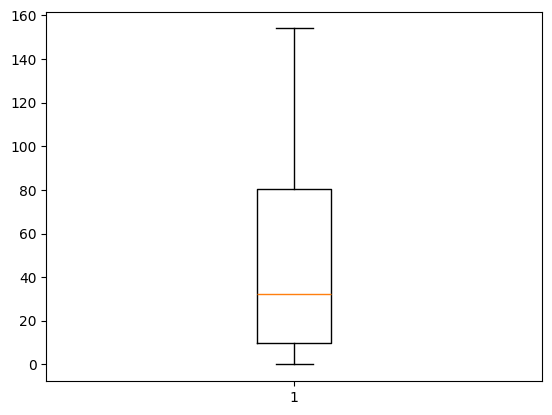

In [10]:
#Your code here
import matplotlib.pyplot as plt
plt.boxplot(df['Runs'])
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [23]:
## Your code here
df['Year'] = pd.DatetimeIndex(df['Start Date']).year
data = df[[
    'Runs',
    'Year'
]]
data = data.groupby(by=['Year']).agg({
    'Runs': ['mean', 'max']
})
data.columns = ['average_runs', 'max_runs']
data = data.reset_index()
data = data.sort_values(by=['average_runs'], ascending=False)
data

,Year,average_runs,max_runs
8,2016,73.900000,154
9,2017,61.666667,122
6,2014,58.529412,139
5,2013,47.826087,115
2,2010,45.375000,118
3,2011,42.000000,117
4,2012,40.363636,128
1,2009,38.333333,107
0,2008,31.800000,54
7,2015,30.400000,138


In [24]:
df[df['Runs'] == 154]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,2016


In [ ]:
df

#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


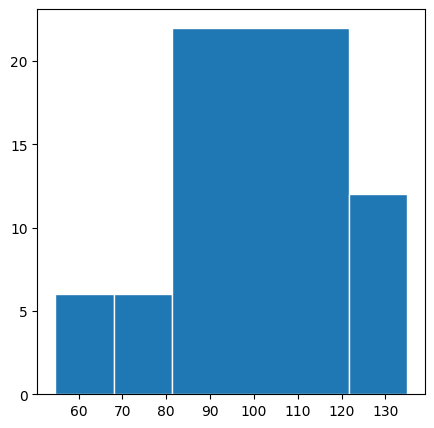

In [19]:
#Your code here
plt.figure(figsize=(5,5))
plt.hist(x=df['Mins'], bins=[54.6,68,81.4,121.6,135], edgecolor="white")
plt.show()

In [13]:
df['Mins'] = df['Mins'].apply(lambda x: 0 if x=='-' else np.int32(x))
df['Mins'].describe()

count    132.000000
mean      67.287879
std       57.852343
min        0.000000
25%       13.750000
50%       48.000000
75%      120.000000
max      202.000000
Name: Mins, dtype: float64

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('virat.csv')
df['Runs'] = df['Runs'].apply(lambda x: np.int32(x.replace('*','')))
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


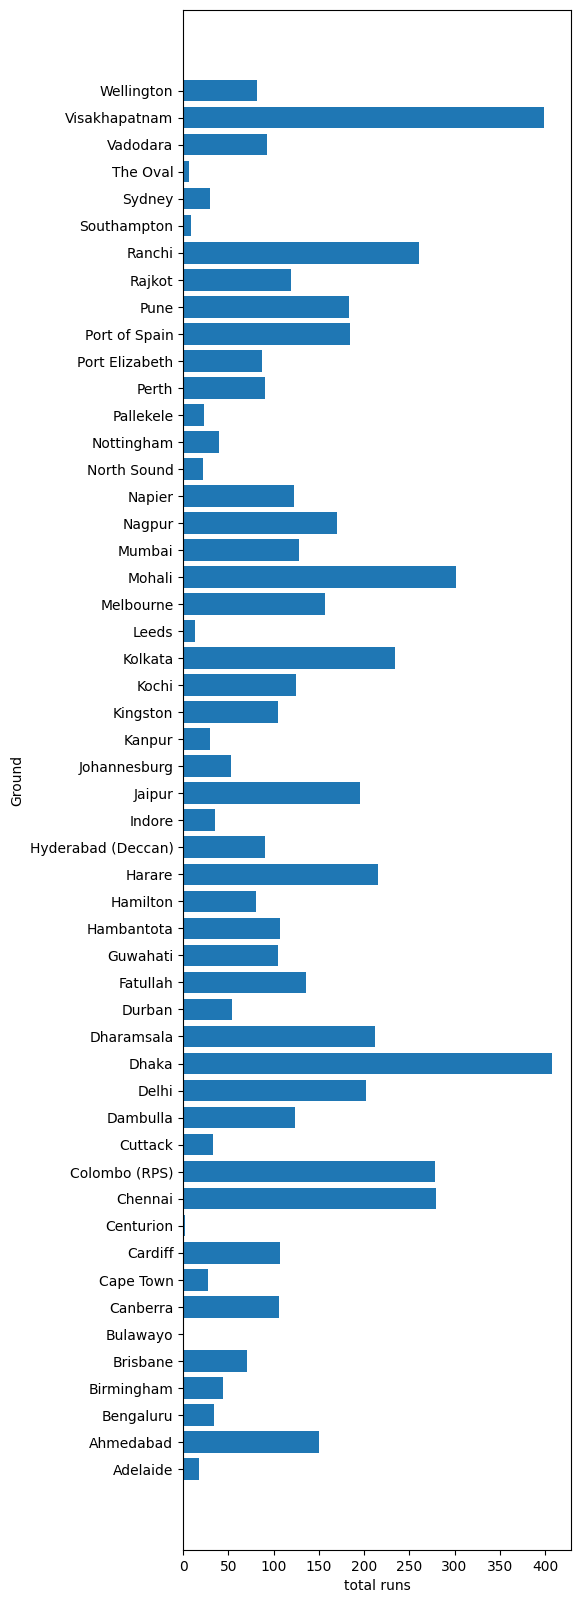

In [46]:
# find virat's performance by ground, definition of performance is total-runs

data = df[[
    'Runs',
    'Ground'
]]
data = data.groupby('Ground').agg({
    'Runs': ['sum']
})
data.columns = ['Runs']
data = data.reset_index()

plt.figure(figsize=[5,20])
plt.ylabel(ylabel='Ground')
plt.xlabel(xlabel='total runs')
plt.barh(y= data['Ground'], width=data['Runs'])
plt.show()

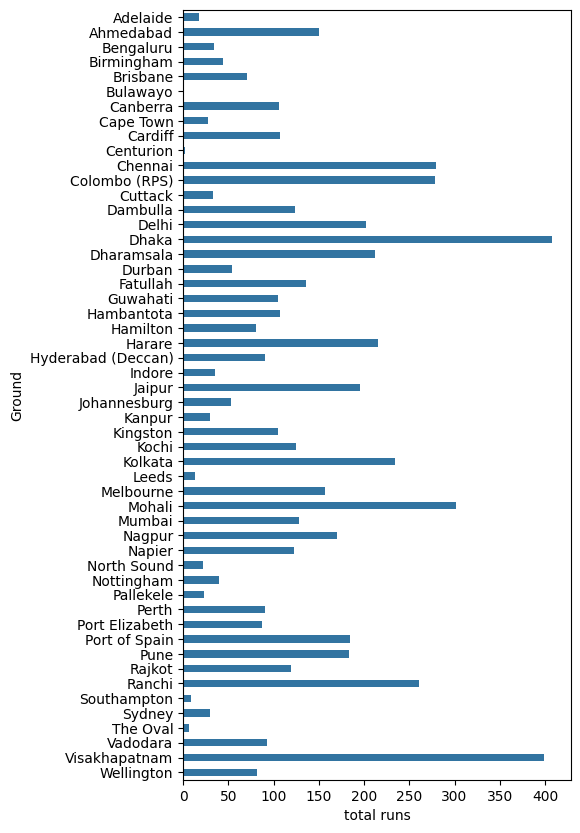

In [74]:
# find virat's performance by ground, definition of performance is total-runs

data = df[[
    'Runs',
    'Ground'
]]
data = data.groupby('Ground').agg({
    'Runs': ['sum']
})
data.columns = ['Runs']
data = data.reset_index()

plt.figure(figsize=[5,10])
plt.ylabel(ylabel='Ground')
plt.xlabel(xlabel='total runs')
sns.barplot(data=data, x='Runs', y='Ground', width=0.5)
plt.show()

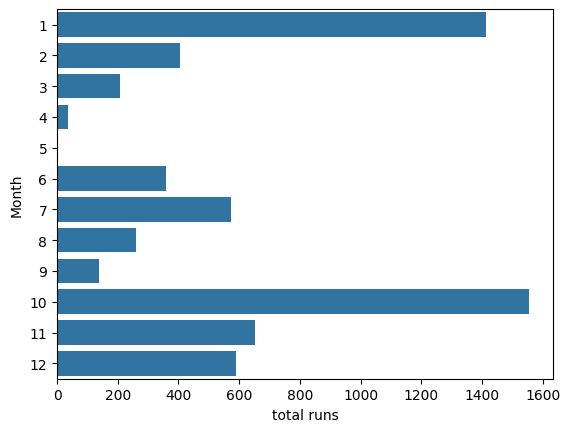

In [59]:
df['Month'] = pd.DatetimeIndex(df['Start Date']).month

data = df[[
    'Runs',
    'Month'
]]

data = data.groupby('Month').agg({
    'Runs': ['sum']
})
data.columns = ['Runs']
data = data.reset_index()

plt.ylabel(ylabel="Month")
plt.xlabel(xlabel="total runs")
sns.barplot(data=data, x="Runs", y="Month", orient='h')
plt.show()

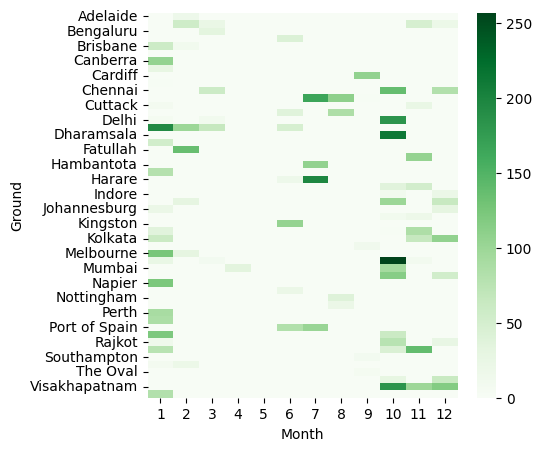

In [83]:
data = df[[
    'Runs',
    'Ground',
    'Month'
]]

data = data.pivot_table(index='Ground', columns='Month', values='Runs', aggfunc='sum').fillna(0)
plt.figure(figsize=(5,5))
sns.heatmap(data=data, cmap='Greens')
plt.show()
# data

In [97]:

df.loc[:, ['Runs', 'Mins']] = df.apply(lambda x: pd.Series(['1','2']), axis=1)
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,NaN,NaN,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,NaN,NaN,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,NaN,NaN,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,NaN,NaN,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,NaN,NaN,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08
